## Vitd Parametric Resampling study

@author: Óscar Barquero Pérez
         Rebeca Goya ESteban
    
    Parametric resampling.
    We want to address the following questions: is the supply of vitD making any significant change
    in the Tb prevalence or not? is the supply of vitD making any significant change
    in the Tb Generalization  or not? 
    We are going to answer using parametric resampling. The presence of Tb of Tb generalized
    is model by a Bernoulli variable, and the total population as a Binomial variable. So we resample
    from a Binomial variabl using p_ml estimation for this year and n = to the population of this year
    and test wheter the p_ml for other years are within the CI 95%. 

# Comparing every other year against 2011

In [1]:
 %matplotlib inline 

CI 95% 2011: 	[ 0.33  0.83]
p 2012: 	0.5217
p 2013: 	0.4761
p 2014: 	0.2916


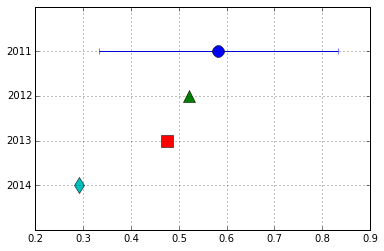

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pylab as plt

VitD = pd.read_csv('VitD_Prev.txt',sep = '\t')

#convert to a matrix

VitD_matrix = VitD.as_matrix()

p = VitD_matrix[:,1].ravel()
n = VitD_matrix[:,2].ravel()

p = p/100

# p_ml from year 2011
p_2011 = p[0]

#n from year 2011
n_2011 = n[0]

#Parametric bootstrap for year 2011
N = 5000
#N resamples taking from a binomial with parameters n_2011 and p_2011
#Note this return the number of successes
boot_parametric = np.random.binomial(n_2011,p_2011,(N))

p_boot_est = boot_parametric/n_2011

#Estimate the 95% CI 
prct = sc.percentile(p_boot_est,[2.75,97.75])

#So comparing each year against 2011

print "CI 95% 2011: \t",np.round(prct,2)
print "p 2012: \t", p[1]
print "p 2013: \t", p[2]
print "p 2014: \t", p[3]

plt.close('all')
plt.errorbar(p_2011,4,xerr = [abs([prct[0]]-p_2011),[prct[1]-p_2011]],fmt='o',markersize = 12)
plt.plot(p[1],3.5,'^',markersize = 12)
plt.plot(p[2],3,'s',markersize = 12)
plt.plot(p[3],2.5,'d',markersize = 12)

plt.ylim((2,4.5))
plt.grid()
plt.yticks([4,3.5,3,2.5],('2011','2012','2013','2014'))
plt.show()


#-----------------------------------------------------------------------------
#Comparing every other year with 2012
#-----------------------------------------------------------------------------

In [3]:
p_2012 = p[1]
n_2012 = n[1]
boot_parametric_2012 = np.random.binomial(n_2012,p_2012,(N))

p_boot_est_2012 = boot_parametric_2012/n_2012

#Estimate the 95% CI 
prct_2012 = sc.percentile(p_boot_est_2012,[2.75,97.75])

#So comparing each year against 2011
print "-----------------------------------------------------------------------"
print "CI 95% 2012: \t",np.round(prct_2012,2)
print "p 2011: \t", p[0]
print "p 2013: \t", p[2]
print "p 2014: \t", p[3]

-----------------------------------------------------------------------
CI 95% 2012: 	[ 0.3   0.74]
p 2011: 	0.583
p 2013: 	0.4761
p 2014: 	0.2916


#-----------------------------------------------------------------------------
#Comparing every other year with 2013
#-----------------------------------------------------------------------------

In [5]:
p_2013 = p[2]
n_2013 = n[2]
boot_parametric_2013 = np.random.binomial(n_2013,p_2013,(N))

p_boot_est_2013 = boot_parametric_2013/n_2013

#Estimate the 95% CI 
prct_2013 = sc.percentile(p_boot_est_2013,[2.75,97.75])

#So comparing each year against 2011
print "-----------------------------------------------------------------------"
print "CI 95% 2013: \t",np.round(prct_2013,2)
print "p 2011: \t", p[0]
print "p 2012: \t", p[1]
print "p 2014: \t", p[3]

-----------------------------------------------------------------------
CI 95% 2013: 	[ 0.33  0.62]
p 2011: 	0.583
p 2012: 	0.5217
p 2014: 	0.2916


#-----------------------------------------------------------------------------
#Comparing every other year with 2013
#-----------------------------------------------------------------------------

In [6]:
p_2014 = p[3]
n_2014 = n[3]
boot_parametric_2014 = np.random.binomial(n_2014,p_2014,(N))

p_boot_est_2014 = boot_parametric_2014/n_2014

#Estimate the 95% CI 
prct_2014 = sc.percentile(p_boot_est_2014,[2.75,97.75])

#So comparing each year against 2011
print "-----------------------------------------------------------------------"
print "CI 95% 2014: \t",np.round(prct_2014,2)
print "p 2011: \t", p[0]
print "p 2012: \t", p[1]
print "p 2013: \t", p[2]

-----------------------------------------------------------------------
CI 95% 2014: 	[ 0.12  0.5 ]
p 2011: 	0.583
p 2012: 	0.5217
p 2013: 	0.4761
